# Clustering Demystified: DBSCAN and the Art of Finding Shape in Chaos


This notebook accompanies the blog post:  
**[Clustering Demystified: DBSCAN and the Art of Finding Shape in Chaos](https://medium.com/@alikhalaji/clustering-demystified-dbscan-and-the-art-of-finding-shape-in-chaos-601e468ebd21?source=user_profile_page---------0-------------2cad5fd31945----------------------)**  
by *Ali Khalaji*

Explore how DBSCAN reveals structure in noisy data, from crescent-shaped clusters to real-world anomaly detection.


## Setup and Imports

We begin by importing essential libraries and setting up the output directory for saving plots.  
This ensures all visualizations are stored and reproducible.


In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


output_dir = Path("..") / "plots"
output_dir.mkdir(parents=True, exist_ok=True)

SEED = 42

## Simulating the Dataset and using DBSCAN with Default Parameters

We generate a noisy two moons dataset using `make_moons`, a classic benchmark for testing clustering algorithms on non-convex shapes.  
This dataset challenges algorithms like K-Means and showcases DBSCAN’s ability to detect curved structures.


We apply DBSCAN with a tighter epsilon (`ε = 0.2`) to observe how it handles noise and curved clusters.  
This helps us understand DBSCAN’s sensitivity to parameter tuning and its ability to separate dense regions from scattered points.

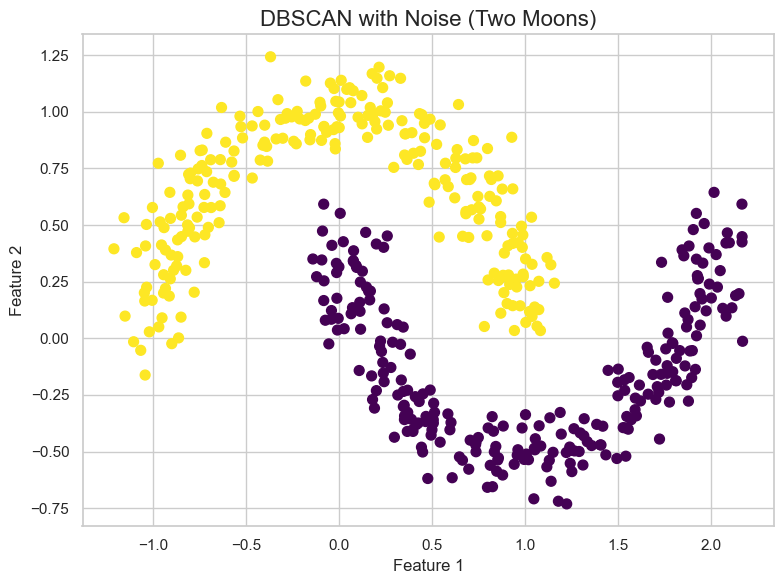

In [9]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate noisy dataset
X_moons, _ = make_moons(n_samples=500, noise=0.1, random_state=SEED)

# Apply DBSCAN with tighter epsilon
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_moons)

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title("DBSCAN with Noise (Two Moons)", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.savefig(output_dir / "dbscan_with_noise.png")
plt.show()


## K-Distance Graph for Tuning ε

To tune DBSCAN, we plot the distance to each point’s 5th nearest neighbor (`k = min_samples = 5`).  
The graph is sorted to reveal a clear elbow point, where the slope sharply increases—indicating the transition from dense clusters to sparse noise.  
We use the **second derivative method via NumPy’s `np.diff()`** to locate this elbow.  
⚠️ Note: The k-distance elbow is a **heuristic**. Visual judgment is involved and may vary across datasets.


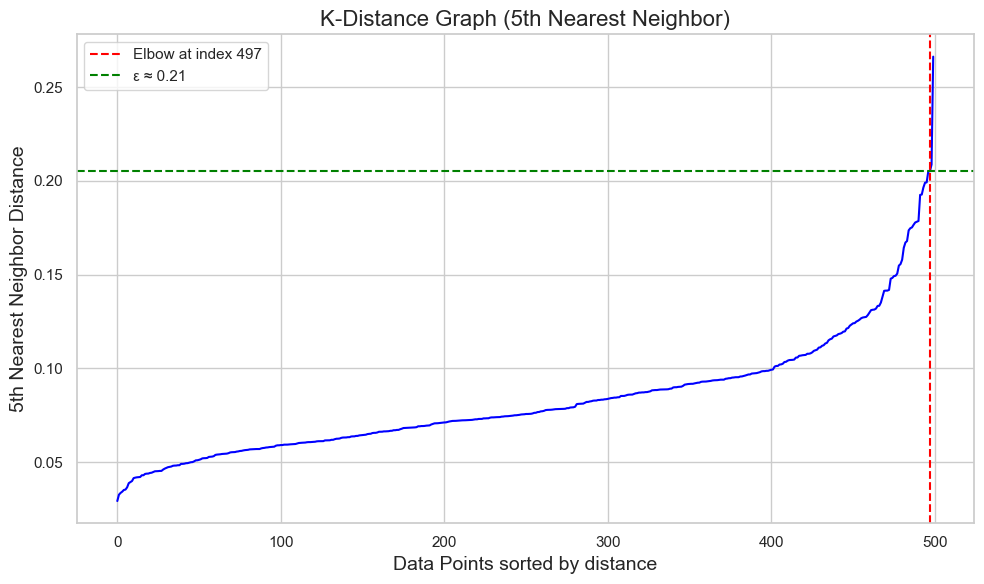

In [10]:
from sklearn.neighbors import NearestNeighbors

# Compute distances to the 5th nearest neighbor
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_moons)
distances, indices = neighbors_fit.kneighbors(X_moons)

# Sort the distances to the 5th nearest neighbor
k_distances = np.sort(distances[:, 4])

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances, color='blue')
plt.title('K-Distance Graph (5th Nearest Neighbor)', fontsize=16)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('5th Nearest Neighbor Distance', fontsize=14)

# Optional: highlight elbow point visually
elbow_index = np.argmax(np.diff(k_distances, 2))  # second derivative
elbow_value = k_distances[elbow_index]
plt.axvline(x=elbow_index, color='red', linestyle='--', label=f'Elbow at index {elbow_index}')
plt.axhline(y=elbow_value, color='green', linestyle='--', label=f'ε ≈ {elbow_value:.2f}')
plt.legend()

# Save and show plot
plt.tight_layout()
plt.savefig(output_dir / "dbscan_k_distance_graph.png")
plt.show()


## DBSCAN with Tuned ε

Using the elbow point from the k-distance graph, we apply DBSCAN with `ε ≈ 0.21`.  
The algorithm successfully identifies the two crescent-shaped clusters, each colored distinctly, and leaves outliers unassigned.  
This visual comparison highlights DBSCAN’s strength in capturing non-linear structures.


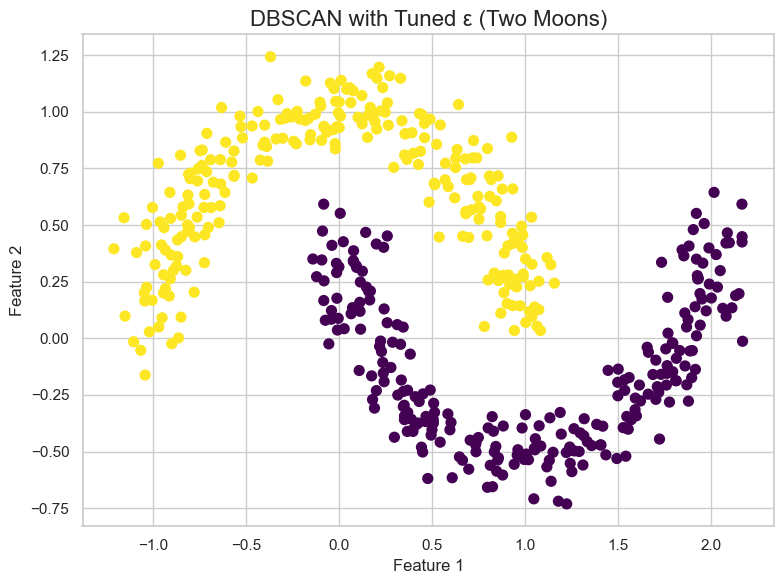

In [11]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with tuned epsilon
dbscan_tuned = DBSCAN(eps=0.21, min_samples=5)
labels_tuned = dbscan_tuned.fit_predict(X_moons)

# Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_tuned, cmap='viridis', s=50)
plt.title("DBSCAN with Tuned ε (Two Moons)", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.savefig(output_dir / "dbscan_tuned_clusters.png")
plt.show()


## Simulating Transaction Data for Anomaly Detection

We simulate a dataset of financial transactions with two features: transaction amount and frequency.  
Most data points represent typical customer behavior, moderate spending and regular activity, generated from a Gaussian distribution.  
We then inject a few suspicious transactions that deviate sharply from the norm, mimicking real-world fraud scenarios.


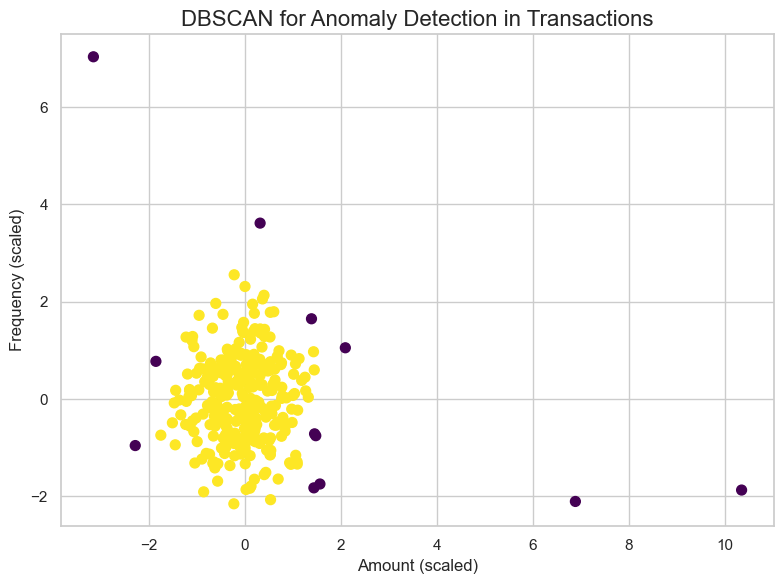

In [12]:
from sklearn.preprocessing import StandardScaler

# Simulate normal transaction behavior
np.random.seed(SEED)
normal_data = np.random.normal(loc=[50, 5], scale=[10, 2], size=(300, 2))

# Add suspicious transactions (anomalies)
anomalies = np.array([[200, 1], [5, 20], [150, 0.5]])
X_transactions = np.vstack([normal_data, anomalies])

# Standardize features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transactions)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN for Anomaly Detection in Transactions", fontsize=16)
plt.xlabel("Amount (scaled)")
plt.ylabel("Frequency (scaled)")
plt.grid(True)
plt.tight_layout()
plt.savefig(output_dir / "dbscan_transaction_anomalies.png")
plt.show()

## Wrap-Up and Next Steps

This notebook demonstrates how DBSCAN can uncover hidden structure in noisy data, from crescent-shaped clusters to financial anomalies.  
It adapts to density, handles noise gracefully, and doesn’t require you to guess the number of clusters.

📬 Found something interesting? Share your results or questions. I’d love to hear how DBSCAN performs in your domain.
